In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
# no warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("./Dados/twitter.csv")
print(data.head())

  classification  label                                          tweets_pt  \
0         Normal      2  mayasolovely como mulher você não deve reclama...   
1      Offensive      1  menino dats frio  tyga dwn ruim para cuffin da...   
2      Offensive      1  urkindofbrand cara   você  fodeu uma cadela  e...   
3      Offensive      1       cganderson vivabased ela parece uma travesti   
4      Offensive      1  shenikaroberts  merda que você ouve sobre mim ...   

                                           tweets_en  \
0  mayasolovely   woman shouldnt complain cleanin...   
1   boy dats coldtyga dwn bad cuffin dat hoe   place   
2  urkindofbrand dawg   ever fuck  bitch start  c...   
3             cganderson vivabased look like  tranny   
4  shenikaroberts shit hear  might  true   might ...   

                                            pt_lemma  \
0  mayasolovelyr como mulher você não dever recla...   
1  menino dats frio   tyga dwn ruim para cuffin d...   
2  urkindofbrand cara    v

In [9]:
x = np.array(data["pt_lemma"])
y = np.array(data["label"])

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(x) 
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train_tree,y_train_tree)

print('Ein = %0.4f' % (1 - accuracy_score(y_train_tree, clf.predict(X_train_tree))))
print('Eout = %0.4f' % (1 - accuracy_score(y_test_tree, clf.predict(X_test_tree))))
print(classification_report(y_test_tree, clf.predict(X_test_tree)))

Ein = 0.0011
Eout = 0.2873
              precision    recall  f1-score   support

           0       0.43      0.33      0.38      1031
           1       0.78      0.82      0.80      3129
           2       0.71      0.77      0.74       796

    accuracy                           0.71      4956
   macro avg       0.64      0.64      0.64      4956
weighted avg       0.70      0.71      0.70      4956



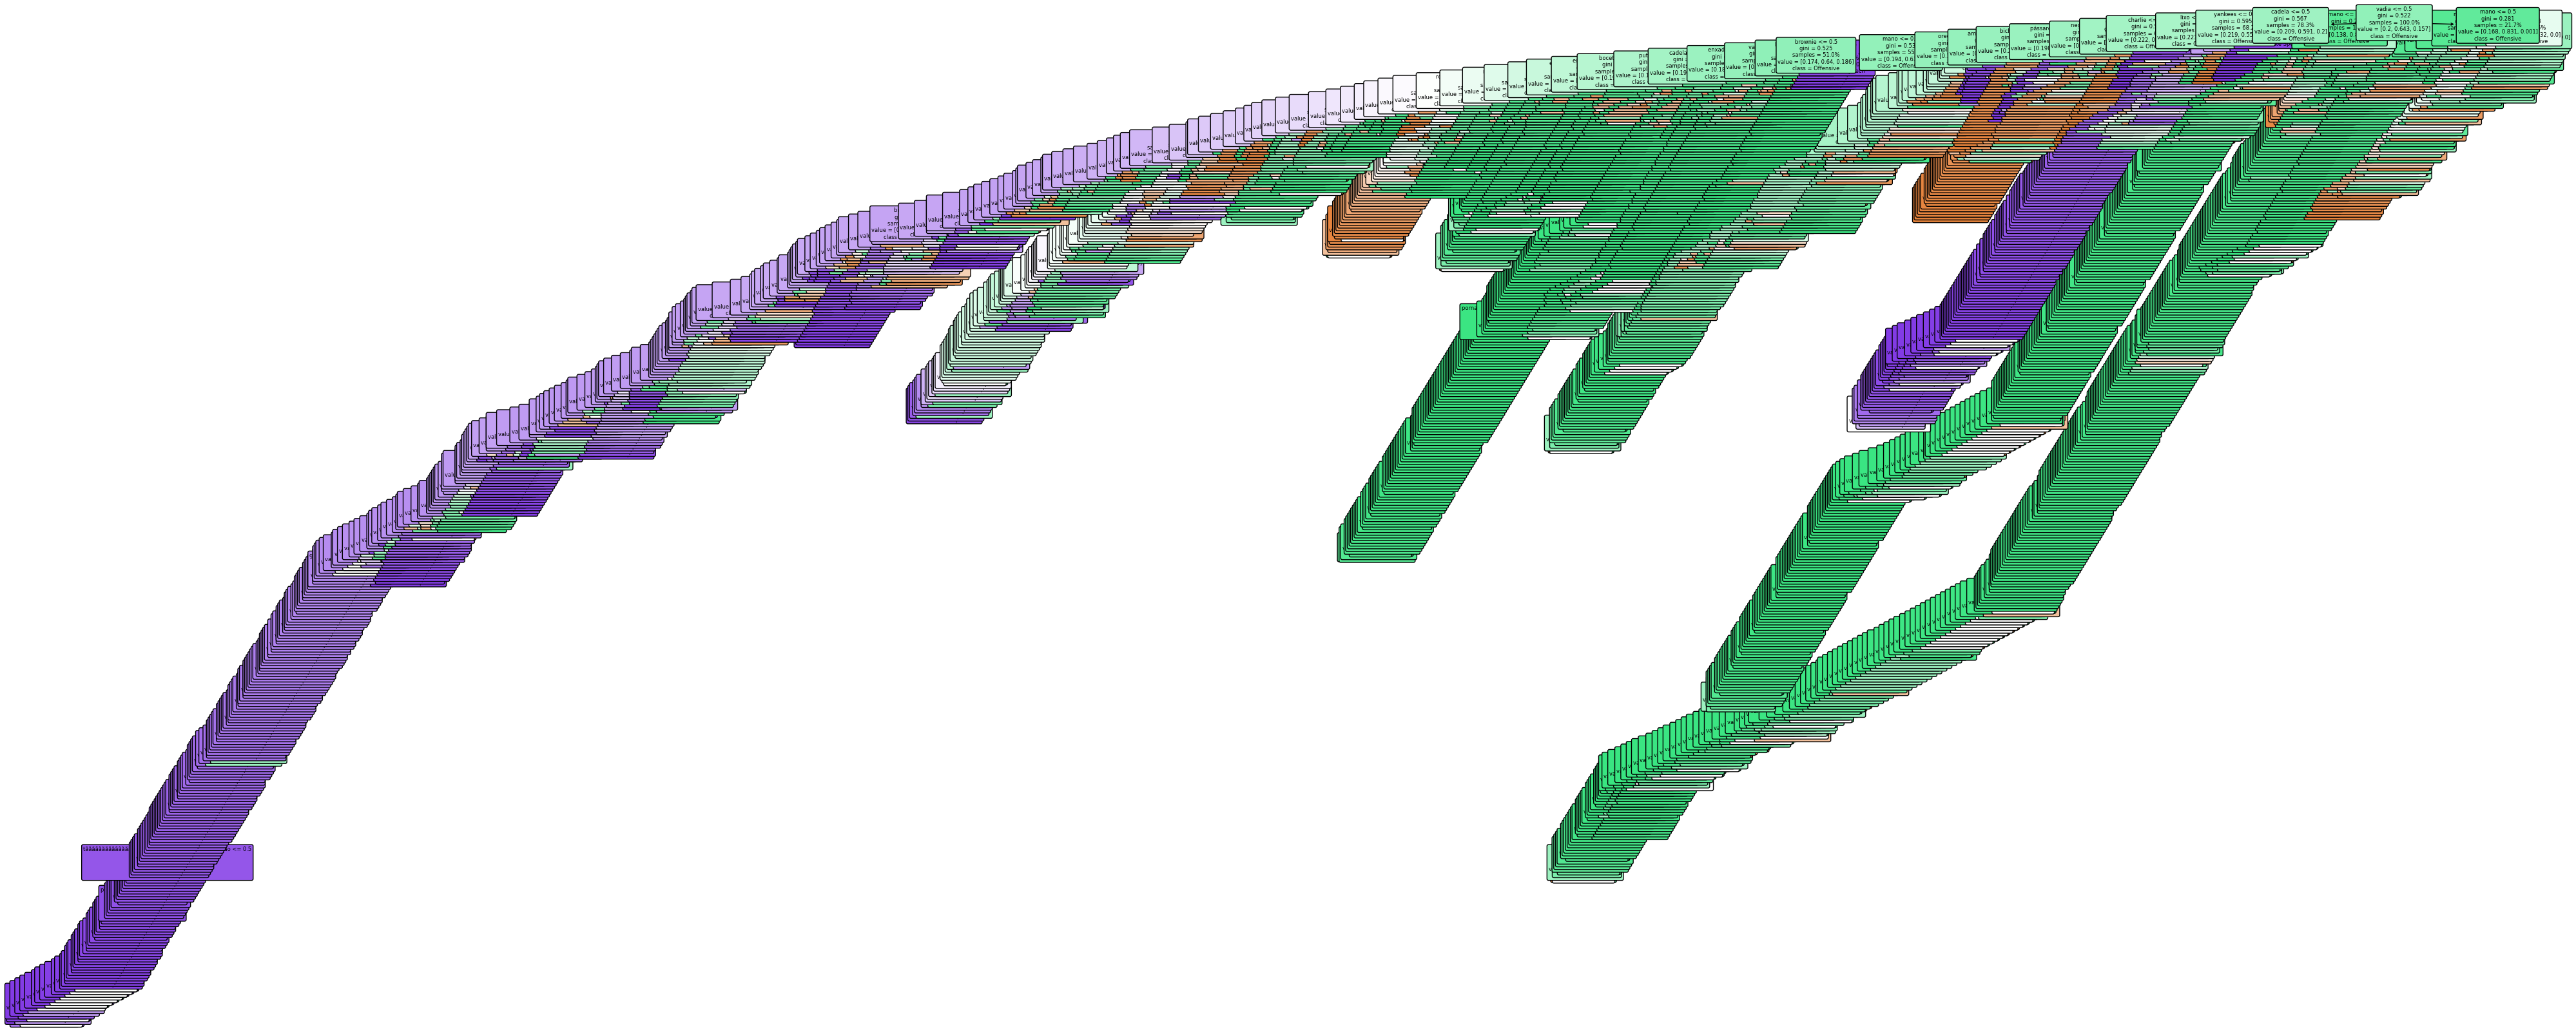

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# feature labels
fn = cv.get_feature_names_out()

# class label
cn = ['Normal', 'Offensive', 'Hate Speech']

plt.figure(figsize=(50,20))
plot_tree(clf,
          feature_names=fn,
          class_names = cn,
          filled=True, 
          proportion = True,
          fontsize=6,
          rounded=True)
plt.savefig('tree.png', dpi=300)

1072
[0.0012714  0.00128559 0.00129161 ... 0.49143254 0.50495355 0.5217806 ]


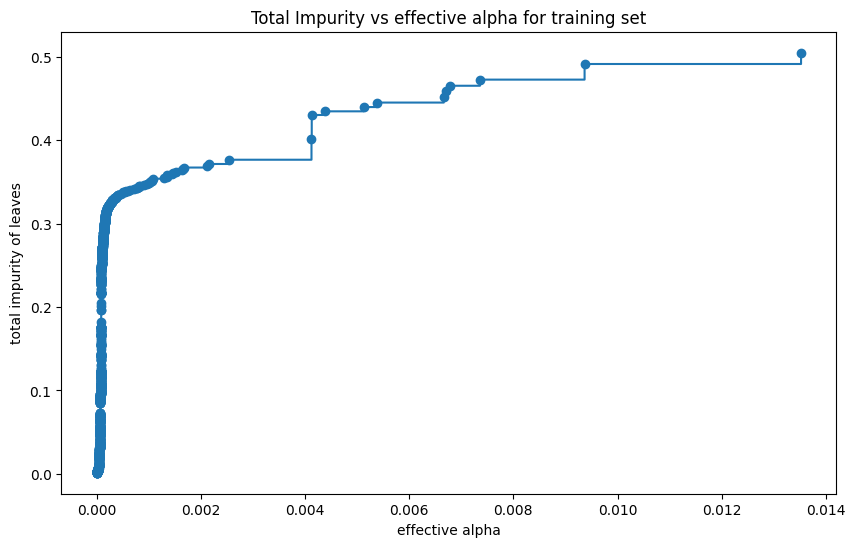

In [13]:
#recuperar os valores efetivos de alpha para a elaboração da fase de poda
path = clf.cost_complexity_pruning_path(X_train_tree, y_train_tree)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plotar a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

print(len(ccp_alphas))
print(impurities)

In [ ]:
cls = []
print(ccp_alphas)

for ccp_alpha in ccp_alphas:
    print(ccp_alphas)
    print(ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_tree, y_train_tree)
    cls.append(clf)

#descartar o último por ser trivial(apenas o nó raiz)
cls = cls[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in cls]
depth = [clf.tree_.max_depth for clf in cls]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


[0.00000000e+00 1.18251766e-07 3.16846837e-07 ... 9.36672991e-03
 1.35210157e-02 1.68270480e-02]
[0.00000000e+00 1.18251766e-07 3.16846837e-07 ... 9.36672991e-03
 1.35210157e-02 1.68270480e-02]
0.0


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (1062,) and (4,)

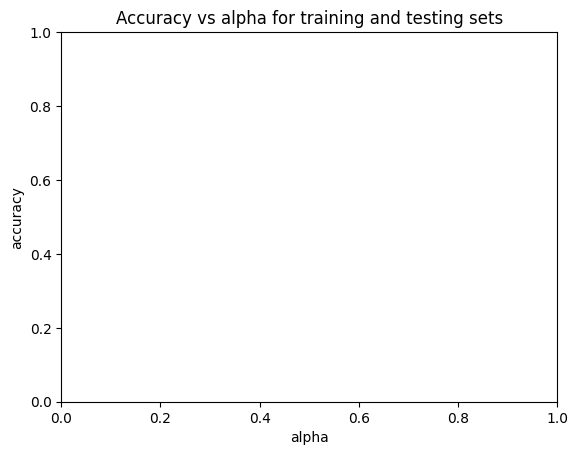

In [ ]:
train_scores = [clf.score(X_train_tree, y_train_tree) for clf in cls]
test_scores = [clf.score(X_test_tree, y_test_tree) for clf in cls]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

best_acc = 0
for i in range(len(test_scores)):
    if test_scores[i] > best_acc:
        best_acc = test_scores[i]
        best_alpha = ccp_alphas[i]

print("Melhor alpha: ", best_alpha)

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(X_train_tree, y_train_tree)

print('Ein = %0.4f' % (1 - accuracy_score(y_train_tree, clf.predict(X_train_tree))))
print('Eout = %0.4f' % (1 - accuracy_score(y_test_tree, clf.predict(X_test_tree))))
print(classification_report(y_test_tree, clf.predict(X_test_tree)))

NameError: name 'best_alpha' is not defined

In [ ]:
feature_labels = cv.get_feature_names_out()

class_labels = ['Normal', 'Offensive', 'Hate Speech']

plt.figure(figsize=(50,20))
plot_tree(clf, 
            feature_names=feature_labels,   
            class_names=class_labels,
            filled=True,
            proportion=True,
            fontsize=6,
            rounded=True)
plt.savefig('tree_pruned.png', dpi=300)


KeyboardInterrupt: 